<a href="https://colab.research.google.com/github/NandanaManoharanU/image-classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Image classification (DEVOPS)
!pip install opencv-python-headless numpy scikit-learn joblib

In [12]:
# import required libraries
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files


In [13]:
# Loading the pre-trained MobileNet Model
model = MobileNet(weights='imagenet')

In [14]:
# Uploading and training image
uploaded = files.upload()

Saving im2 to im2 (2)


Saving im2 to im2 (3)
Loaded image: im2 (3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
Top 3 Predictions:
1. Doberman: 81.16%
2. vizsla: 4.98%
3. Rhodesian_ridgeback: 4.09%


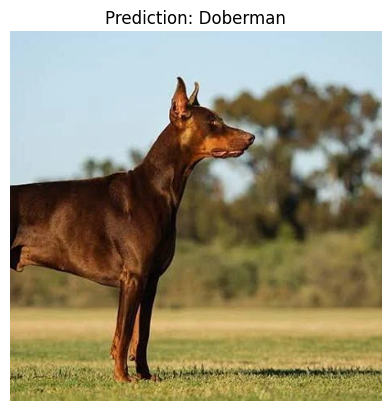

In [15]:
# Upload your image
uploaded = files.upload()

# Get the filename of the uploaded image
img_path = list(uploaded.keys())[0]
print(f"Loaded image: {img_path}")

# Load the pretrained model
model = MobileNet(weights='imagenet')

# Read image with OpenCV
img = cv2.imread(img_path)
if img is None:
    raise ValueError("Image not loaded. Check filename and path.")

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize to 224x224
img_resized = cv2.resize(img_rgb, (224, 224))

# Prepare for MobileNet
x = image.img_to_array(img_resized)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict
preds = model.predict(x)

# Decode predictions
decoded = decode_predictions(preds, top=3)[0]
print("Top 3 Predictions:")
for i, (imagenetID, label, prob) in enumerate(decoded):
    print(f"{i+1}. {label}: {prob*100:.2f}%")

# Show image with top prediction
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Prediction: {decoded[0][1]}")
plt.show()